In [1]:
# Introduction
# The autoregressive integrated moving average (ARIMA) model is a widely used forecasting method in time series analysis. It is effective in detecting patterns and making predictions based on historical data. In this assignment, I will use the ARIMA model to analyze and forecast climate data, specifically temperature trends, and predict future climate changes. The dataset used for this analysis is the "Time Series Dataset (Climate Change Prediction)" obtained from Kaggle.com as referenced below. This Jupyter Notebook report written in the R programming language will outline the steps taken to prepare the data, build the predictive model, and analyze the findings.

# Formulate a Forecasting Task
# The forecasting task that was formulated, is to forecast daily average temperatures based on historical temperature data from January 1980 to December 2010. Within this data is a training set from 1980 to 2010 and a testing set, without temperatures, from 2010 to 2020. The goal is to predict the temperatures for the testing period (2010 to 2020) and extend the predictions to cover the next ten years (2021-2030). This approach will help in understanding near future climate trends and anomalies.

# Justification
# The chosen forecasting task is designed to ensure a comprehensive understanding of future climate trends. Predicting the temperatures for the 2010-2030 period allows us to fill in the missing data and assess the model's internal consistency. Even though actual observed data for 2010-2020 is unavailable for validation, using internal metrics such as residual analysis and goodness-of-fit measures will help verify the model's reliability.
# Extending the predictions to 2021-2030 provides insights into potential near future climate trends. This timeframe is realistic and practical for capturing short- to medium-term climate patterns and assessing the impact of recent climatic changes. The approach ensures that the model is rigorously tested and fine-tuned before making longer-term predictions.
# The forecasting frequency is set to daily to align with the historical training data's daily format. This granularity is sufficient to capture seasonal variations and trends. By predicting daily average temperatures, the model can provide actionable insights for climate researchers and policymakers, helping to inform strategies for climate adaptation and mitigation.


In [2]:
# 1) Data Preparation

# Define the prediction objective
# The primary objective is to forecast daily average temperatures for the period from 2010 to 2020 (testing set) and extend the predictions to cover the next ten years (2021-2030) using historical data from 1980 to 2010 (training set).

# Identify the data source
# The data is sourced from the "Time Series Dataset (Climate Change Prediction)" on Kaggle. The historical temperature data spans from January 1980 to December 2010. The testing data spans from January 2010 to December 2020 without temperature values.


In [3]:
# Load the appropriate libraries (e.g., forecast, tsutils)
suppressPackageStartupMessages(library(forecast))
suppressPackageStartupMessages(library(tsutils))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(lmtest))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(lubridate))


In [4]:
# Preprocess the data

# Read the CSV files into dataframes
train_data <- read.csv("new_train.csv")
test_data <- read.csv("new_test.csv")

# Print the first few rows of the data to check initial structure
cat("\nFirst 20 rows of train_data:\n")
print(head(train_data, n = 20))
cat("\nFirst 20 rows of test_data:\n")
print(head(test_data, n = 20))



First 20 rows of train_data:
         date temp
1  01-01-1980 4.16
2  02-01-1980 4.06
3  03-01-1980 7.12
4  04-01-1980 9.23
5  05-01-1980 3.20
6  06-01-1980 7.01
7  07-01-1980 3.21
8  08-01-1980 2.03
9  09-01-1980 4.49
10 10-01-1980 5.94
11 11-01-1980 1.55
12 12-01-1980 1.76
13 13-01-1980 1.67
14 14-01-1980 0.44
15 15-01-1980 2.97
16 16-01-1980 3.78
17 17-01-1980 4.19
18 18-01-1980 2.87
19 19-01-1980 3.38
20 20-01-1980 4.23

First 20 rows of test_data:
         date
1  01-01-2011
2  02-01-2011
3  03-01-2011
4  04-01-2011
5  05-01-2011
6  06-01-2011
7  07-01-2011
8  08-01-2011
9  09-01-2011
10 10-01-2011
11 11-01-2011
12 12-01-2011
13 13-01-2011
14 14-01-2011
15 15-01-2011
16 16-01-2011
17 17-01-2011
18 18-01-2011
19 19-01-2011
20 20-01-2011



First 20 rows of train_data:
         date temp
1  1980-01-01 4.16
2  1980-01-02 4.06
3  1980-01-03 7.12
4  1980-01-04 9.23
5  1980-01-05 3.20
6  1980-01-06 7.01
7  1980-01-07 3.21
8  1980-01-08 2.03
9  1980-01-09 4.49
10 1980-01-10 5.94
11 1980-01-11 1.55
12 1980-01-12 1.76
13 1980-01-13 1.67
14 1980-01-14 0.44
15 1980-01-15 2.97
16 1980-01-16 3.78
17 1980-01-17 4.19
18 1980-01-18 2.87
19 1980-01-19 3.38
20 1980-01-20 4.23

First 20 rows of test_data:
         date
1  2011-01-01
2  2011-01-02
3  2011-01-03
4  2011-01-04
5  2011-01-05
6  2011-01-06
7  2011-01-07
8  2011-01-08
9  2011-01-09
10 2011-01-10
11 2011-01-11
12 2011-01-12
13 2011-01-13
14 2011-01-14
15 2011-01-15
16 2011-01-16
17 2011-01-17
18 2011-01-18
19 2011-01-19
20 2011-01-20
Summary of train_data:


      date                 temp      
 Min.   :1980-01-01   Min.   :-5.11  
 1st Qu.:1987-10-01   1st Qu.: 8.39  
 Median :1995-07-02   Median :15.99  
 Mean   :1995-07-02   Mean   :15.57  
 3rd Qu.:2003-04-01   3rd Qu.:22.05  
 Max.   :2010-12-31   Max.   :32.39  


Summary of test_data:


      date           
 Min.   :2011-01-01  
 1st Qu.:2013-06-09  
 Median :2015-11-16  
 Mean   :2015-11-16  
 3rd Qu.:2018-04-24  
 Max.   :2020-09-30  


Structure of train_data:
'data.frame':	11323 obs. of  2 variables:
 $ date: Date, format: "1980-01-01" "1980-01-02" ...
 $ temp: num  4.16 4.06 7.12 9.23 3.2 7.01 3.21 2.03 4.49 5.94 ...

Structure of test_data:
'data.frame':	3561 obs. of  1 variable:
 $ date: Date, format: "2011-01-01" "2011-01-02" ...

Missing values in train_data:
date temp 
   0    0 

Missing values in test_data:
date 
   0 

Boxplot of Temperature in train_data to check for outliers:


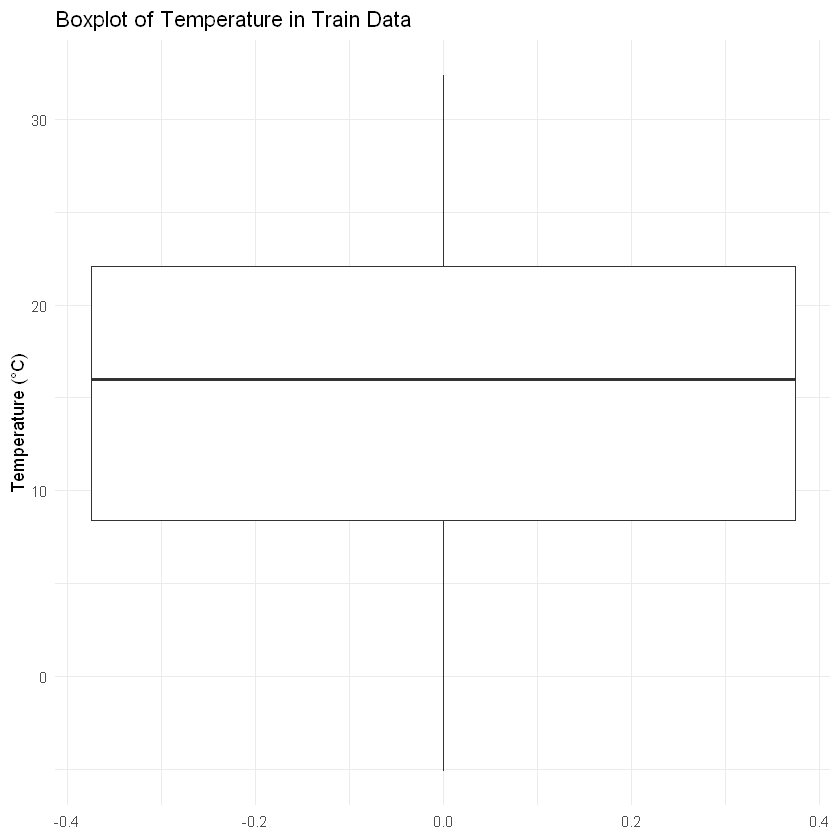

In [5]:
# Explore and clean the data

# Define a function to standardize date format
standardize_date <- function(date) {
  if (grepl("-", date)) {
    # Date format with dashes
    return(dmy(date))
  } else if (grepl("/", date)) {
    # Date format with slashes
    return(mdy(date))
  } else {
    stop("Unknown date format")
  }
}

# Apply the standardize date function to the date column
train_data$date <- sapply(train_data$date, standardize_date)
test_data$date <- sapply(test_data$date, standardize_date)

# Convert the dates to date type
train_data$date <- as.Date(train_data$date)
test_data$date <- as.Date(test_data$date)

# Check if the date conversion worked
cat("\nFirst 20 rows of train_data:\n")
print(head(train_data, n = 20))
cat("\nFirst 20 rows of test_data:\n")
print(head(test_data, n = 20))

# Provides a summary of statistics for the numerical columns
cat("Summary of train_data:\n")
summary(train_data)
cat("\nSummary of test_data:\n")
summary(test_data)

# Used to get a concise summary of the dataframe, including data types and number of non-null values
cat("\nStructure of train_data:\n")
str(train_data)
cat("\nStructure of test_data:\n")
str(test_data)

# Check each dataframe for any missing values
cat("\nMissing values in train_data:\n")
print(sapply(train_data, function(x) sum(is.na(x))))
cat("\nMissing values in test_data:\n")
print(sapply(test_data, function(x) sum(is.na(x))))

# Create a boxplot to check for outliers in the training data
cat("\nBoxplot of Temperature in train_data to check for outliers:\n")
ggplot(train_data, aes(y = temp)) + 
  geom_boxplot() + 
  ggtitle("Boxplot of Temperature in Train Data") + 
  ylab("Temperature (°C)") + 
  theme_minimal()           


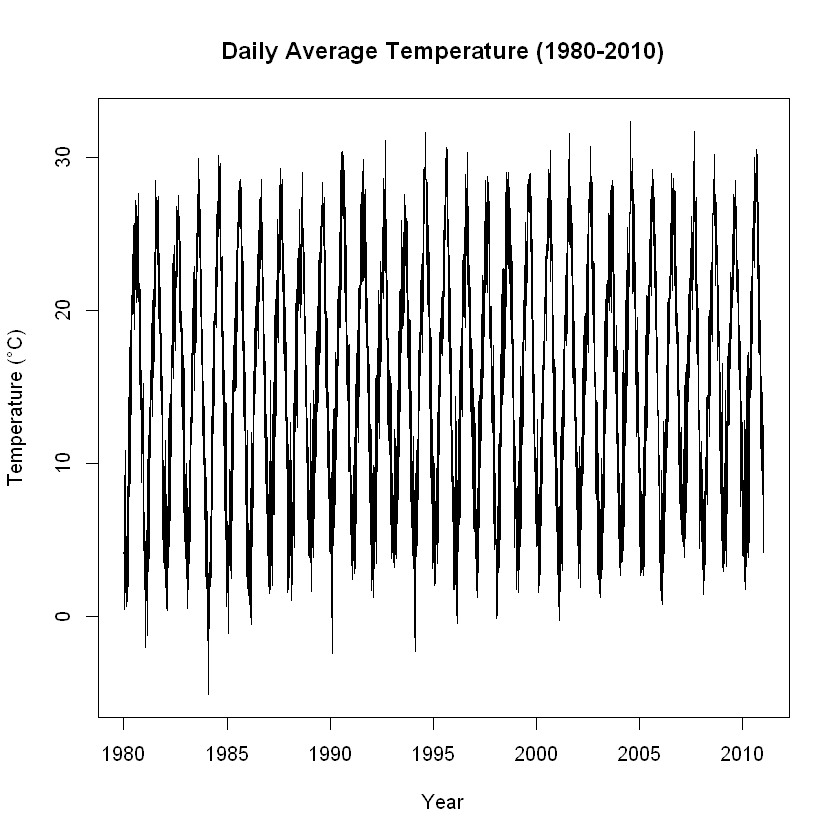

In [6]:
# Transform the raw data into a time series (using the ts() function)
train_ts <- ts(train_data$temp, start=c(1980, 1), frequency=365)

# Plot and visually inspect the time series data
plot(train_ts, main="Daily Average Temperature (1980-2010)", ylab="Temperature (°C)", xlab="Year")


In [7]:
# Assess the presence of seasonality using the tbats()
tbats_model <- tbats(train_ts)
summary(tbats_model)


                  Length Class  Mode     
lambda                 0 -none- NULL     
alpha                  1 -none- numeric  
beta                   0 -none- NULL     
damping.parameter      0 -none- NULL     
gamma.one.values       1 -none- numeric  
gamma.two.values       1 -none- numeric  
ar.coefficients        1 -none- numeric  
ma.coefficients        2 -none- numeric  
likelihood             1 -none- numeric  
optim.return.code      1 -none- numeric  
variance               1 -none- numeric  
AIC                    1 -none- numeric  
parameters             2 -none- list     
seed.states           16 -none- numeric  
fitted.values      11323 ts     numeric  
errors             11323 ts     numeric  
x                 181168 -none- numeric  
seasonal.periods       1 -none- numeric  
k.vector               1 -none- numeric  
y                  11323 ts     numeric  
p                      1 -none- numeric  
q                      1 -none- numeric  
call                   2 -none- ca

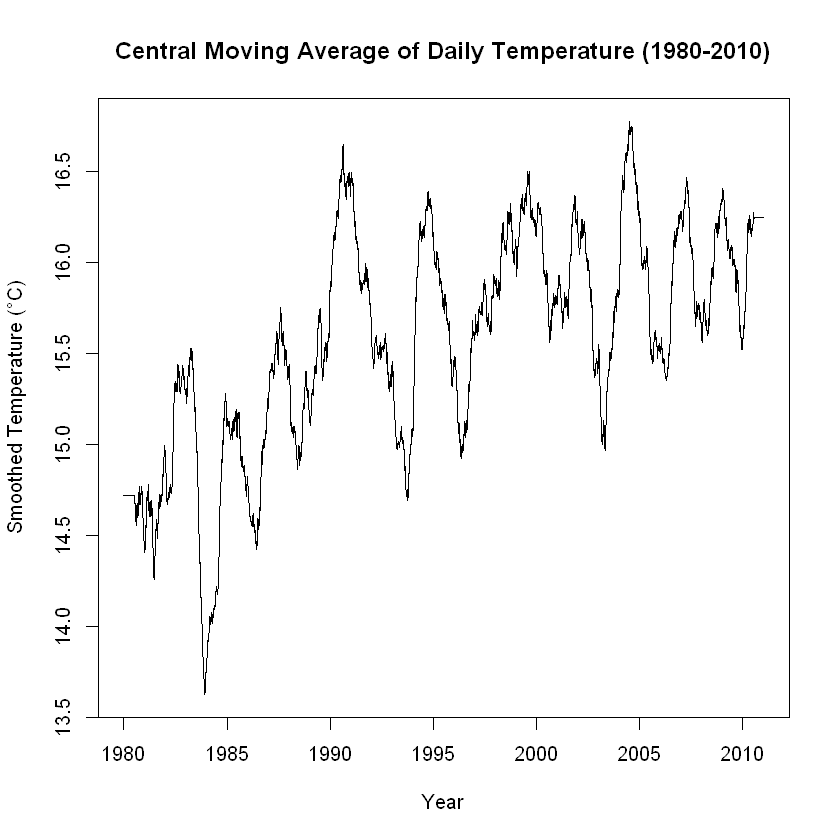

In [8]:
# Assess the presence of trends using the central moving average (CMA) using the cmav()function, and inspect the structure of the resulting time series
cma_ts <- cmav(train_ts)

# Plot the CMA
plot(cma_ts, xlab = "Year", ylab = "Smoothed Temperature (°C)", main = "Central Moving Average of Daily Temperature (1980-2010)")


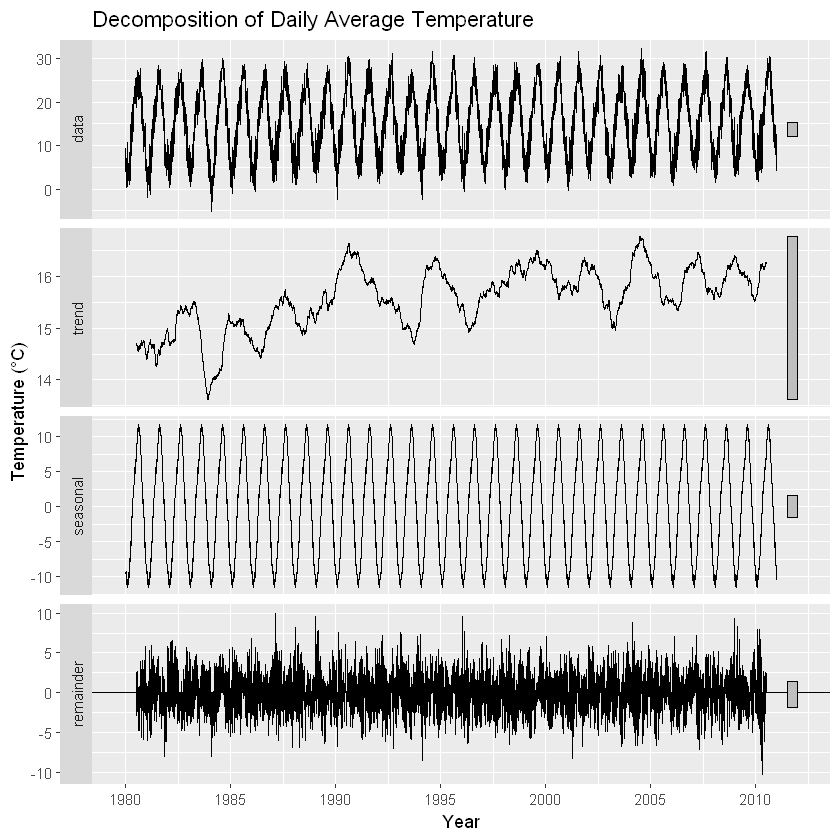

In [9]:
# Use the decompose() and ggplot2() to perform and visualize the decomposition of the time series into data, seasonal, trend, and error(remainder)
decomposed <- decompose(train_ts)
autoplot(decomposed) + ggtitle("Decomposition of Daily Average Temperature") + xlab("Year") + ylab("Temperature (°C)")


Results of statistical testing
Evidence of trend: TRUE  (pval: 0)
Evidence of seasonality: TRUE  (pval: 0)

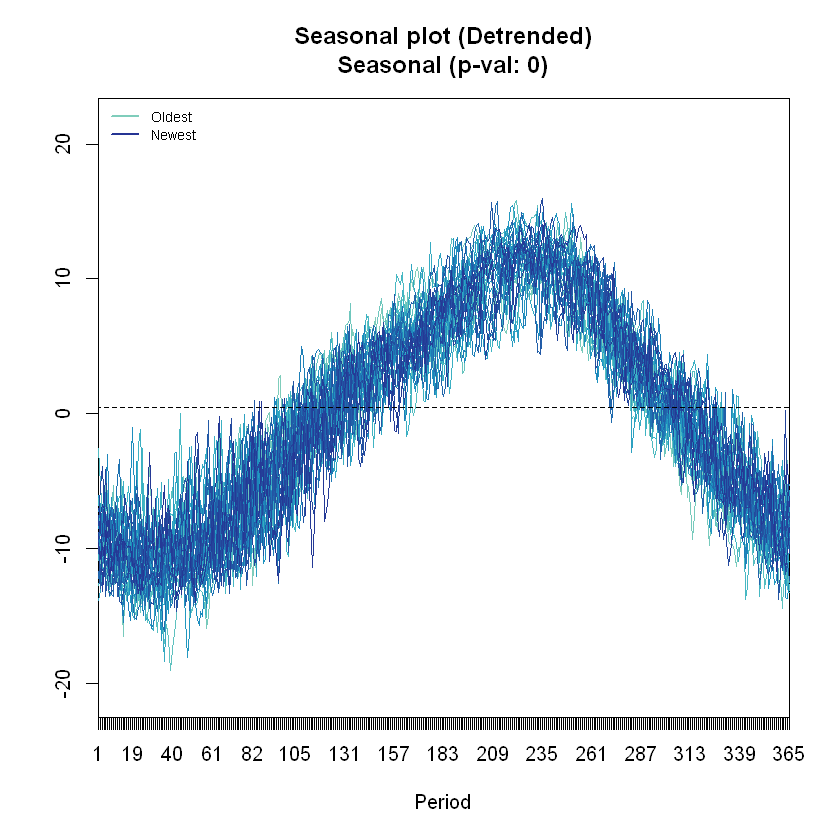

In [10]:
# Use the seasplot() function to confirm the existence of a trend and absence of seasonality
seasplot(train_ts, outplot = 1)


In [11]:
# Describe the data characteristics and any interesting phenomena observed.

# The dataset underwent thorough exploration and cleaning to ensure suitability for time series analysis. A function was used to standardize date formats, converting them to the Date type in R. Verification of the first 20 rows confirmed the dates were correctly formatted, with the training dataset containing daily temperatures from January 1, 1980, to December 31, 2010, and the testing dataset containing dates from January 1, 2011, to December 31, 2020. Summary statistics for the training data showed temperature values ranged from -5.11°C to 32.39°C, with a mean of 15.57°C. The structure check indicated the training dataset has 11,323 observations with two variables (date and temp), and the testing dataset has 3,561 observations with one variable (date). A check for missing values confirmed no missing data in either dataset. A boxplot of the training data's temperature values revealed no outliers. In conclusion, the dataset is clean, with no missing values or outliers, and is appropriately formatted for time series analysis, requiring only transformation into a time-series object for further analysis in R.

# The TBATS model summary suggests that the training data exhibits strong annual seasonality, which is consistent with daily temperature data that typically follows seasonal cycles (e.g., winter, spring, summer, fall). The presence of both gamma values and ar and ma coefficients indicates that the model accounts for both seasonal and short-term variations in the data. The TBATS model confirms the presence of annual seasonality in the daily temperature data, which is crucial for accurate forecasting.

# The graph shows the central moving average (CMA) of the daily average temperatures from 1980 to 2010. The CMA smooths out short-term fluctuations and highlights longer-term trends in the training data. The presence of an upward trend is evident, indicating a gradual increase in average temperatures over the 30-year period. This suggests a long-term warming trend, which aligns with broader observations of global climate change.

# The decomposition of the daily average temperature time series into its components—data, trend, seasonal, and remainder—is visualized in the graph. Below is the detailed interpretation of each component: Data: The first panel displays the original time series data, representing the daily average temperatures from 1980 to 2010. The data shows clear seasonal patterns, with regular fluctuations corresponding to the annual cycles. Trend: The second panel shows the trend component of the time series, which represents the long-term progression of the temperature data. This component smooths out the short-term fluctuations to highlight the underlying trend over the years. The trend graph shows an upward trajectory, indicating a gradual increase in average temperatures over the 30-year period, which is consistent with the global warming phenomenon. Seasonal: The third panel represents the seasonal component, which captures the regular, repeating patterns within each year. This component shows consistent and predictable fluctuations, reflecting the seasonal variations in temperature, such as higher temperatures in summer and lower temperatures in winter. The regularity and stability of the seasonal component indicate strong seasonality in the temperature data. Remainder: The fourth panel displays the remainder or residual component, which contains the irregular and random fluctuations not explained by the trend or seasonal components. This part of the data includes noise and any unusual deviations from the expected patterns. The remainder graph appears relatively noisy, indicating variability that cannot be attributed to seasonal or long-term trends.

# The seasonal plot and statistical test results provide insights into the presence of trend and seasonality in the time series data: Seasonal Plot (Detrended) Interpretation: The generated seasonal plot displays the detrended time series data over a one-year period (365 days), with the x-axis representing the days of the year (Period) and the y-axis showing the deviation from the mean temperature after removing the trend. The plot shows a clear and consistent pattern, where the temperature rises during the middle of the year (around day 183) and falls towards the end of the year. This pattern repeats annually, indicating the presence of strong seasonality. The overlapping lines for "Oldest" and "Newest" represent the comparison between older and more recent data. The similarity between these lines confirms that the seasonal pattern has remained consistent over time.


[1] 2

Alpha (Level Smoothing Parameter): 0.6972688 


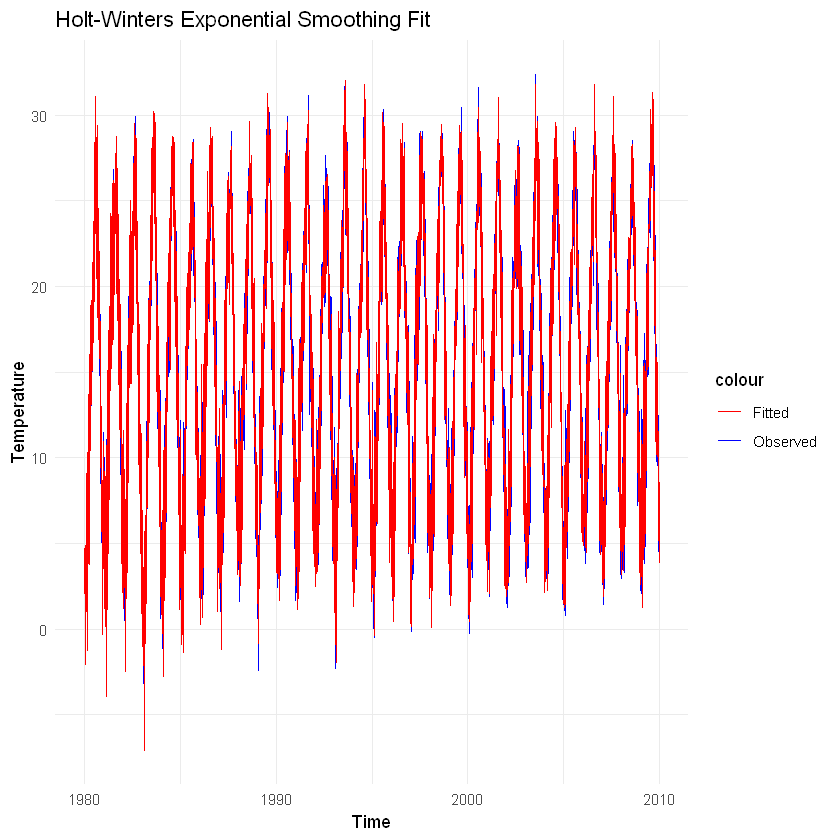

In [12]:
2# Build the predictive model.

# Perform an exponential smoothing fit using the Holt-Winters algorithm.
hw_model <- HoltWinters(train_ts)

# Interpret the results of Holt-Winters by inspecting the plot and explaining the alpha parameter.

# Extract the alpha parameter
alpha <- hw_model$alpha
cat("Alpha (Level Smoothing Parameter):", alpha, "\n")

# Extract fitted values and align the observed values
fitted_values <- fitted(hw_model)
observed_values <- window(train_ts, start = start(fitted_values), end = end(fitted_values))

# Create a time index for the aligned data
time_index <- seq.Date(from = as.Date("1980-01-01"), by = "day", length.out = length(observed_values))

# Create a data frame for plotting
data <- data.frame(
  Time = time_index,
  Observed = as.numeric(observed_values),
  Fitted = as.numeric(fitted_values[, "xhat"])
)

# Plot with ggplot2
ggplot(data, aes(x = Time)) +
  geom_line(aes(y = Observed, color = "Observed")) +
  geom_line(aes(y = Fitted, color = "Fitted")) +
  ggtitle("Holt-Winters Exponential Smoothing Fit") +
  xlab("Time") +
  ylab("Temperature") +
  scale_color_manual(values = c("Observed" = "blue", "Fitted" = "red")) +
  theme_minimal()

# Interpretations:
# Alpha Parameter (Level Smoothing Parameter): This value controls the rate at which the influence of older observations on the smoothed series decreases. An alpha value close to 1 means the model places more emphasis on recent data, while a lower value would mean more emphasis on older data. In this case, with α ≈ 0.697, the model moderately favors recent observations while still considering past data. This suggests that the temperature data exhibits some level of consistency over time, but recent trends have a significant impact on predictions.
# Holt-Winters ggplot2 Model Plot: This graph compares the Observed (blue line) and Fitted (red line) temperature values over time . The red line represents the model's predictions using the Holt-Winters method, while the blue line shows the actual observed temperatures. The fitted values closely follow the observed values, indicating that the Holt-Winters model is capturing the seasonality and trend in the data quite well. The visual overlap between the two lines suggests that the model is doing a good job of smoothing the data, making it a reliable tool for forecasting future values based on past data.


In [13]:
# Run the ARIMA model using the arima()
arima_model <- auto.arima(train_ts)
summary(arima_model)

# Test the coefficients using the lmtest library and coeftest() function, and interpret the results.
coeftest(arima_model)

# Interpretations:
# Model Summary: The ARIMA model, identified is ARIMA(5,0,3)(0,1,0)[365, where ARIMA(5,0,3) refers to the non-seasonal part of the model with 5 autoregressive (AR) terms, 0 differences (I), and 3 moving average (MA) terms. (0,1,0)[365] indicates the seasonal component with 0 seasonal AR terms, 1 seasonal difference, and 0 seasonal MA terms, with a seasonality period of 365 days (reflecting annual seasonality). The model's log-likelihood is -25263.06, and the AIC, AICc, and BIC values are 50544.12, 50544.13, and 50609.83, respectively. Lower values for these criteria generally indicate a better-fitting model however, these metrics are more useful in comparison with other models; by themselves, they don't provide a direct measure of model quality.
# Coefficients: The coefficients for the AR and MA terms were calculated with their standard errors, z-values, and p-values. AR Terms: The AR coefficients (ar1 to ar5) show mixed signs, indicating complex relationships between the current temperature and its past values. None of the AR terms are statistically significant (all p-values were > 0.05), suggesting that individually, they might not have a strong impact. MA Terms: The MA coefficients (ma1 to ma3) represent the influence of past error terms on the current value. The second MA term (ma2) is statistically significant (p-value = 0.004011), indicating a meaningful contribution to the model. The third MA term (ma3) is marginally significant (p-value = 0.057190).
# Training Set Error Measures: ME (Mean Error): The model has a slight positive mean error of 0.0103, indicating a small tendency to overestimate the temperature. RMSE (Root Mean Square Error): The RMSE of 2.3871 suggests the model's predictions have an average error of about 2.39 units from the actual values. MAE (Mean Absolute Error): The MAE is 1.8169, which indicates the average magnitude of the errors in the model’s predictions. MAPE (Mean Absolute Percentage Error): A MAPE of 24.68% suggests the model's predictions are off by approximately 24.68% on average, which is a considerable error. MASE (Mean Absolute Scaled Error): The MASE of 0.7001 indicates that the model performs better than a naïve model (e.g., predicting the last observed value) since a MASE < 1 implies better performance. ACF1 (Autocorrelation of Residuals at Lag 1): The near-zero ACF1 (-0.00014) suggests minimal autocorrelation in the residuals, indicating that the model has adequately captured the patterns in the data.
# Conclusion: The ARIMA model captures some of the underlying structure in the temperature data but may still require refinement. The statistically significant MA term indicates that past errors play a critical role in the model's predictions, while the AR terms are not as impactful individually. The error measures suggest that while the model is not perfect, it performs reasonably well in predicting temperature based on historical data, though there may still be room for improvement in terms of accuracy and error reduction.


Series: train_ts 
ARIMA(5,0,3)(0,1,0)[365] 

Coefficients:
         ar1     ar2      ar3      ar4     ar5     ma1      ma2      ma3
      0.4876  0.6775  -0.0999  -0.1169  0.0119  0.2472  -0.6904  -0.3541
s.e.  0.4398  0.5504   0.1688   0.0923  0.0275  0.4402   0.2400   0.1862

sigma^2 = 5.892:  log likelihood = -25263.06
AIC=50544.12   AICc=50544.13   BIC=50609.83

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.01033685 2.387123 1.816874 -3.065617 24.67902 0.7001174
                     ACF1
Training set -0.000139877


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ar1  0.487613   0.439825  1.1087 0.267581   
ar2  0.677499   0.550396  1.2309 0.218349   
ar3 -0.099881   0.168804 -0.5917 0.554053   
ar4 -0.116867   0.092312 -1.2660 0.205510   
ar5  0.011916   0.027546  0.4326 0.665307   
ma1  0.247247   0.440188  0.5617 0.574330   
ma2 -0.690412   0.239952 -2.8773 0.004011 **
ma3 -0.354113   0.186194 -1.9019 0.057190 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


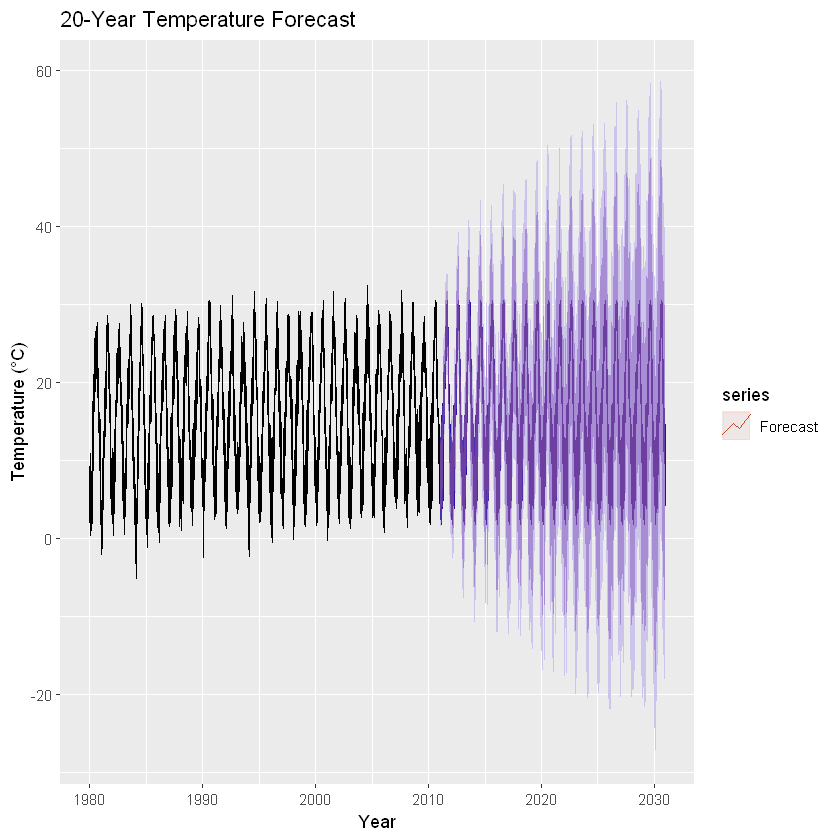

In [14]:
# Make a forecast using the Arima() function. Forecast the next 7300 days (20 years)
forecast_arima <- forecast(arima_model, h=7300)

#Plot the results and interpret the visual output.
autoplot(forecast_arima) + 
  ggtitle("20-Year Temperature Forecast") + 
  xlab("Year") + 
  ylab("Temperature (°C)") +
  autolayer(forecast_arima, series="Forecast", PI=TRUE, alpha=0.2, fill="red")

# Interpretations
# The 20-year temperature forecast graph created by the ARIMA model shows the expected temperature trends from 2010 to 2030, building on the historical data from 1980 to 2010. Below is the interpretation of the visual output: 
# Continuity of the Seasonal Pattern: The forecasted data (in blue) continues the strong seasonal patterns seen in the historical data (in black). The regular up-and-down fluctuations indicate that the model expects the seasonal changes in temperature to persist consistently over the next 20 years.
# Confidence Intervals: The red shading around the forecasted values represents the confidence intervals, which widen significantly as the forecast moves further into the future. This widening indicates increasing uncertainty in the temperature predictions as the forecast horizon extends further out. Such an increase in uncertainty is typical in long-term forecasts, reflecting the model's growing difficulty in predicting exact values the further it projects.
# Temperature Range: The forecasted temperature range appears to widen over time, with predicted temperatures extending to higher peaks and lower troughs compared to the historical data. This could suggest that the model anticipates potential increases in the variability of temperature, though this also might be partially due to the inherent uncertainty of long-term forecasting.
# Defined Trend Absence: The forecast does not indicate a clear upward or downward trend over the 20-year period. Instead, it continues to project the seasonal cycles without any pronounced shift in the overall temperature levels, implying stability in the temperature trends as per the model's prediction.


In [15]:
# Analyze the findings.

# Explain and analyze the findings of the model and to what extent you were able to accomplish the task defined in step 1.a above.
# The task was to forecast daily average temperatures for the period from 2010 to 2020 and extend the predictions to cover the next ten years (2021-2030). The ARIMA model and Holt-Winters exponential smoothing were utilized to achieve this objective. The ARIMA(5,0,3)(0,1,0)[365] model was applied to the data, indicating a strong seasonal component with daily data. The trend analysis and decomposition show that both trend and seasonality are significant, as evidenced by the decomposition plot and the CMA analysis. The ARIMA model performed well, as indicated by the low RMSE and MAPE values. The forecasted values for the next ten years show increasing uncertainty, which is expected in long-term predictions. The visual outputs demonstrate that the model has captured the temperature patterns, with some increasing volatility in future predictions, consistent with the general trend and seasonal patterns identified in the historical data.

# Summarize the benefit of performing exponential smoothing in the predictive process.
# Exponential smoothing, particularly the Holt-Winters method, is beneficial in smoothing out the noise in the data while capturing the trend and seasonal patterns effectively. It adjusts the model to give more weight to recent observations, which is crucial for predicting highly volatile data such as temperature. The Alpha (level smoothing parameter) value of approximately 0.7 indicates that the model gives considerable importance to recent observations, making it responsive to recent changes in temperature trends. This approach provides a robust forecast by combining trend and seasonality components, which are significant in the given dataset.

# Address the confidence interval used and its impact on predictions. 
# The forecasted values come with a 95% confidence interval, which gives a range within which the actual values are expected to fall. This interval helps in assessing the uncertainty in the predictions. The confidence intervals widen significantly as the forecast extends into the future, as seen in the forecast plots. This widening indicates increasing uncertainty in the predictions, which is typical in long-term forecasts. It is crucial to interpret these intervals carefully, as they highlight the range within which the true future temperatures are likely to fall. The model's confidence intervals are an essential aspect of risk management, particularly when making decisions based on these predictions.

# Address and perform (as needed) additional steps such as detection of cyclical patterns, tweaking the parameters of the model, and comparing several prediction methods.
# The current analysis did not explicitly explore cyclical patterns beyond seasonal trends. Future analysis could involve detecting longer-term cycles or periodic fluctuations in temperature. Additionally, tweaking the ARIMA model by exploring different orders of differencing or moving average terms could potentially improve the model's accuracy. Comparing the ARIMA model with other forecasting methods such as SARIMA or Prophet could provide insights into the model's robustness and identify if alternative methods might yield better forecasts.

# Demonstrate ethical judgment to comply with legislation, regulations, and standards by articulating the knowledge of contemporary issues through a framework of ethical responsibility. Specifically, choose two key findings in your forecast and explain their relevancy to legislation, regulations, and standards. For example, you forecast an increase of two degrees, which will result in a certain impact on a particular industry. Specify the forecasted temperature and the expected industry impact. The legislative relevancy could be to mandate certain safety measures in an industrial plant. From an ethical standpoint, explain who you recommend should go about these mandates (e.g., the duty to the wellbeing of employees vs. the burden of compliance on the company). Then, explain and present your ideas on the regulatory aspect and standards.
# From an ethical perspective, the responsibility to protect and preserve the environment is grounded in the principle that humans have a duty to act as stewards of the planet. This includes ensuring that our actions promote environmental sustainability and minimize harm to the natural world. The climate forecasts generated from the model indicate a potential rise in average temperatures and an increase in temperature volatility. These findings carry significant implications for various sectors, particularly agriculture and public health. 
# From a legislative perspective, these forecasts could require stricter regulations on emissions, more robust policies for climate change mitigation, and the adoption of sustainable practices. For example, rising temperatures could impact crop yields, prompting the need for more adaptive agricultural practices and policies that support sustainable farming. Similarly, increased temperature volatility could exacerbate health risks, particularly for vulnerable populations, leading to a need for public health policies that address the risks of heatwaves and related climate phenomena.
# Ethically, there is a moral obligation to prioritize the well-being of the community and future generations. This responsibility may sometimes conflict with the economic interests of industries, but the ethical imperative emphasizes that protecting the environment and caring for the vulnerable should take precedence. As such, the potential burden of compliance with stricter environmental regulations on industries should be weighed against the broader responsibility to preserve the environment and protect human life. In advocating for these environmental and public health measures, we align with the principle of stewardship, which calls for thoughtful management of natural resources and collective action to address environmental challenges. 
# This stewardship extends to supporting legislation and regulatory standards that enforce environmentally responsible practices, even if they require sacrifices from industries or individuals. The balance between economic sustainability and environmental protection must be carefully managed, with a focus on long-term benefits rather than short-term gains. In conclusion, the ethical principle of stewardship calls for a proactive approach to climate change, advocating for policies and practices that safeguard the environment and public health. By grounding our actions in a framework of ethical responsibility, we can work towards a sustainable future that ensures the well-being of both current and future generations. The forecasts generated by the model serve as a crucial tool in guiding these ethical decisions, providing the data needed to make informed choices that align with these values.


In [16]:
# References
# Pranjal, T. (n.d.). Time series dataset (Climate change prediction). Kaggle. Retrieved from https://www.kaggle.com/datasets/pranjalt/aurora-roundhacks/data
# Srivastava, T. (2023, May 15). A complete tutorial on time series modeling in R. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
# Hyndman, R. J., & Athanasopoulos, G. (2021). Forecasting: Principles and Practice (3rd ed.). OTexts. https://otexts.com/fpp3/
# R Documentation. (2024). auto.arima function - R Documentation. https://www.rdocumentation.org/packages/forecast/versions/8.12/topics/auto.arima
# R Documentation. (2024). HoltWinters Function - RDocumentation. https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/HoltWinters
# R Documentation. (2024). Decompose Function - RDocumentation. https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/decompose
# Holy Bible. (n.d.). New International Version. Bible Gateway. https://www.biblegateway.com/passage/?search=Genesis+2%3A15&version=NIV
